In [11]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler

# Model Building
import keras
from keras.models import Sequential
from keras.layers import Dense 
from sklearn import metrics


In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dataset = pd.concat([train, test], ignore_index=True, sort=False)
dataset.drop("Survived", axis=1, inplace=True)
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [19]:
dataset["Age"] = dataset["Age"].astype(int, errors="ignore") 
dataset = dataset.drop(["Name", "Ticket", "Cabin"], axis=1)
dataset = dataset.replace({"female": 0, "male": 1})
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,S
1,2,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,4,1,0,35.0,1,0,53.1000,S
4,5,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,1305,3,1,NaN,0,0,8.0500,S
1305,1306,1,0,39.0,0,0,108.9000,C
1306,1307,3,1,38.5,0,0,7.2500,S
1307,1308,3,1,NaN,0,0,8.0500,S


<AxesSubplot:>

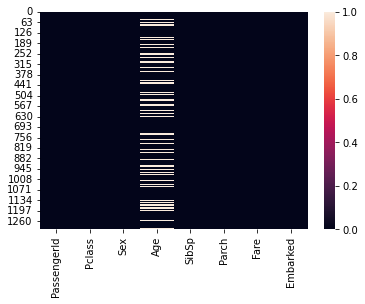

In [20]:
sns.heatmap(dataset.isnull())

In [23]:
dataset.isnull().sum() 

PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [24]:
dataset = dataset.fillna(0)
dataset.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

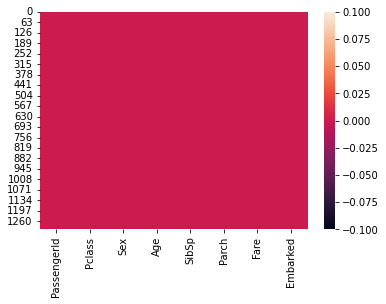

In [25]:
sns.heatmap(dataset.isnull())

In [27]:
dataset.describe()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.644003,23.877517,0.498854,0.385027,33.270043
std,378.020061,0.837836,0.478997,17.590845,1.041658,0.865560,51.747063
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Count'>

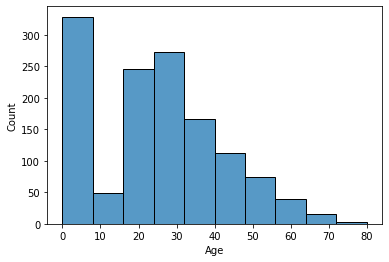

In [35]:
sns.histplot(dataset["Age"], bins=10)

<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

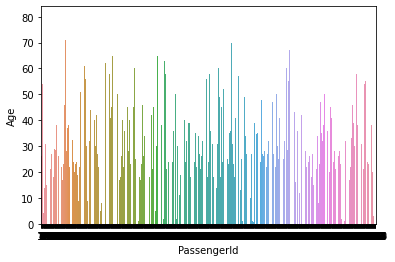

In [38]:
sns.barplot(x="PassengerId", y="Age", data=dataset)

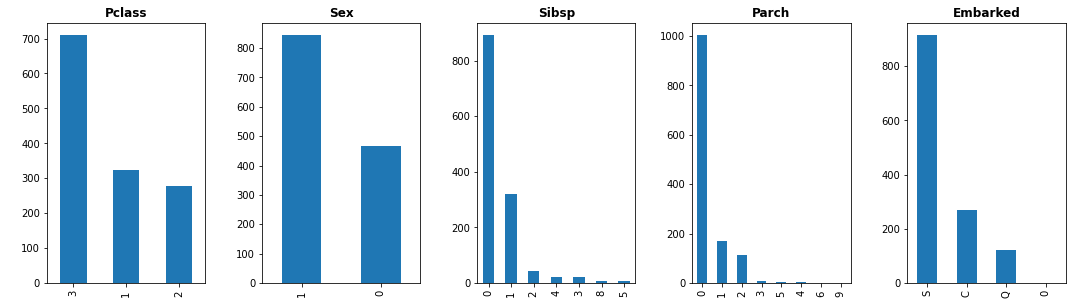

In [43]:
cou = 1
plt.figure(figsize=(15,20))

print("\n\n")

for i in dataset.columns: 
    if i not in ["Age", "Fare", "PassengerId"]: 
        plt.subplot(5, 5, cou)
        plt.title(f'{i.title()}', fontweight='bold',fontsize=14)
        cou += 1
        plt.tight_layout() 
        dataset[i].value_counts().plot(kind = "bar")
        plt.ylabel(" ")
        plt.title(f'{i.title()}', fontweight="bold", fontsize=12)
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Histogram of Age With Positive and Negative Cases'}, xlabel='Age', ylabel='Count'>

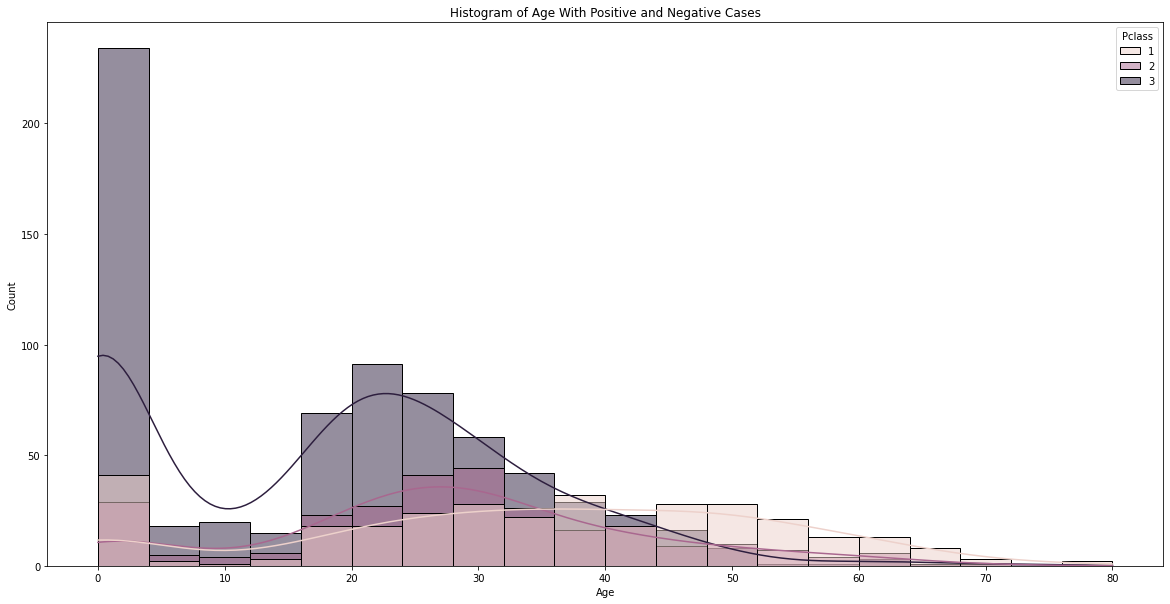

In [46]:
plt.figure(figsize=(20, 10))
plt.title("Histogram of Age With Positive and Negative Cases")
sns.histplot(data=dataset, x="Age", hue="Pclass", bins=20, kde=True)

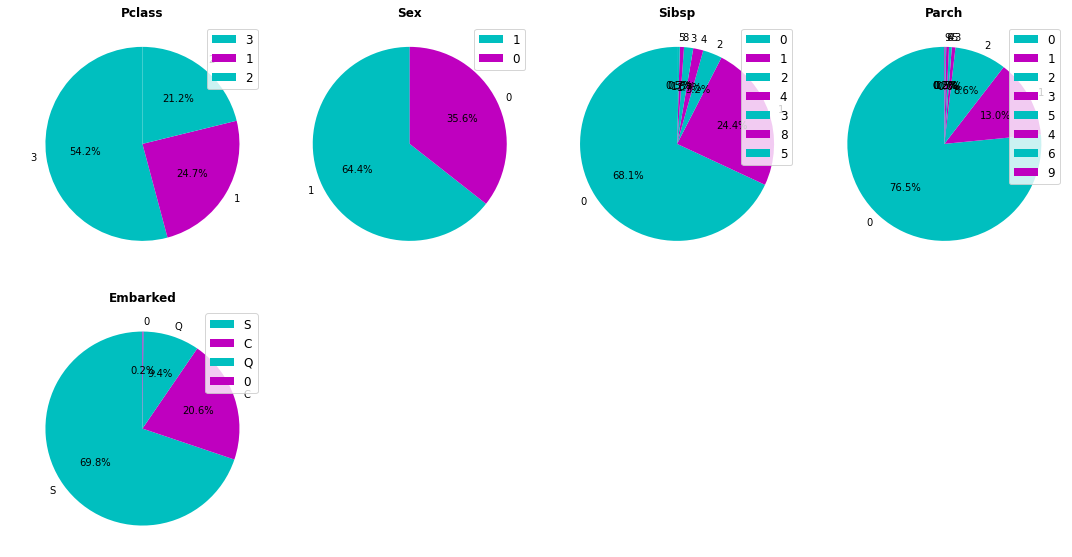

In [52]:
cou = 1 
plt.figure(figsize=(15,20))
print("\n\n") 

for i in dataset.columns:
    if i not in ["Age", "Fare", "PassengerId"]:
        plt.subplot(5, 4, cou)
        plt.title("f'{i.title()}", fontweight="bold", fontsize=14) 
        cou += 1
        plt.tight_layout() 
        dataset[i].value_counts().plot(kind="pie", colors=["c", "m"], 
                                       legend=True, 
                                       startangle=90, 
                                       autopct='%1.1f%%')
        plt.ylabel(" ")
        plt.title(f'{i.title()}', fontweight="bold", fontsize=12)
        plt.legend(loc = "upper right", fontsize=12) 

plt.tight_layout() 


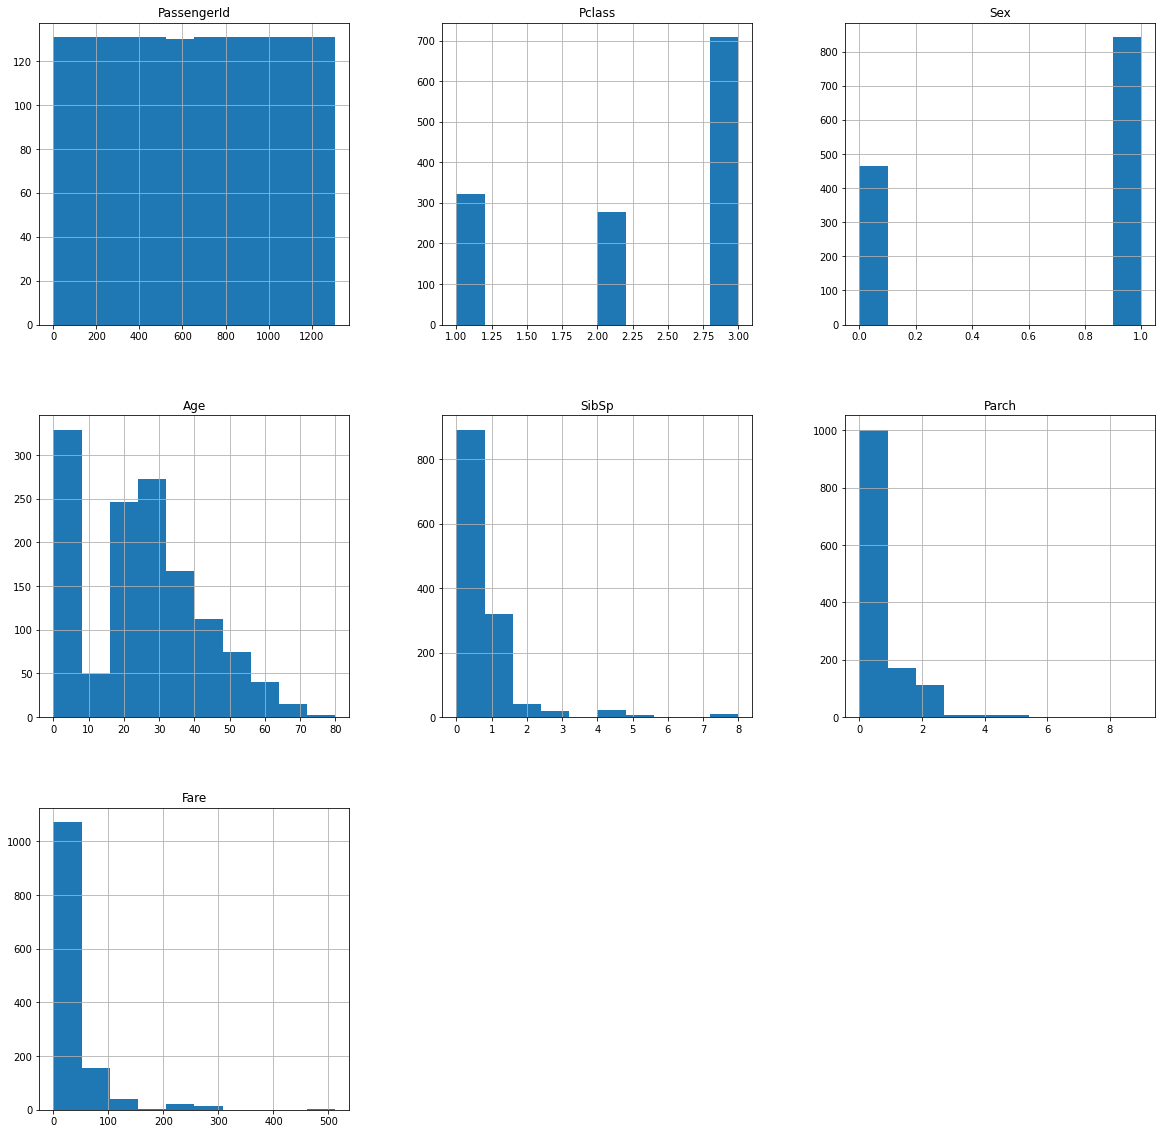

In [53]:
dataset.hist(figsize = (20, 20));

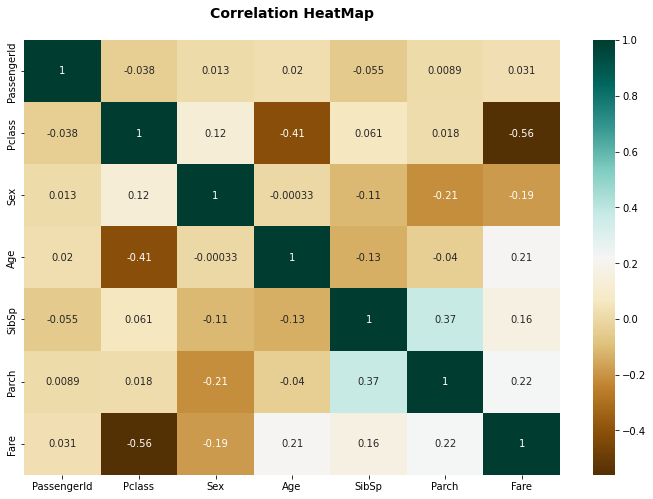

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="BrBG") 
plt.title("Correlation HeatMap\n", fontweight="bold", fontsize="14")
plt.show()

In [56]:
dataset.shape

(1309, 8)

In [58]:
dataset = dataset.drop(["Embarked"], axis=1)
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,3,1,0.0,0,0,8.0500
1305,1306,1,0,39.0,0,0,108.9000
1306,1307,3,1,38.5,0,0,7.2500
1307,1308,3,1,0.0,0,0,8.0500
